In [1]:
import os
import subprocess
import shutil
import matplotlib.pyplot as plt
import cv2
import re
import numpy as np
import pandas as pd

## Moving all files inside folder to all-pics folder

In [ ]:
obj = os.scandir(path="lfw")
for entry in obj:
    if entry.is_dir():
        files = os.scandir(path=entry.path)
        for file in files:
            print(file.path)
            shutil.move(file.path, "all-pics/")

## Creating new file to keep track of datasets

In [14]:
data = []
files_in_dir = os.scandir("all-pics")

files = [] 
for entry in files_in_dir:
    files.append(entry.path)
    
files = sorted(files)  

def get_next_image_path(image_path):
    global files 
#     pattern = r"all-pics\/[a-zA-Z-_]+_(\d+)\.[a-z]+"
    pattern = r"_0*\d+\."
    def replacement_func(match):
#         print(match.group()[1:-1])
        number = int(match.group()[1:-1])
        return "_" + str(number + 1).zfill(4) + "."
    new_path = re.sub(pattern, replacement_func, image_path )
#     print(image_path)
    return new_path if new_path in files else None


def make_entry(anchor_path, image_path, label):
    global data 
    print(anchor_path, image_path)
    print("Creating a new {} entry".format("Positive" if label == 1 else "Negative"))
    fig, im = plt.subplots(1, 2)
    im[0].imshow(cv2.imread(anchor_path))
    im[0].axis("off")
    im[1].imshow(cv2.imread(image_path))
    im[1].axis("off")
    plt.show()
    data.append([anchor_path, image_path, label])
    return ;
    

### Creating array of labelled data

Sample: 0
all-pics/AJ_Cook_0001.jpg all-pics/AJ_Lamas_0001.jpg
Creating a new Negative entry


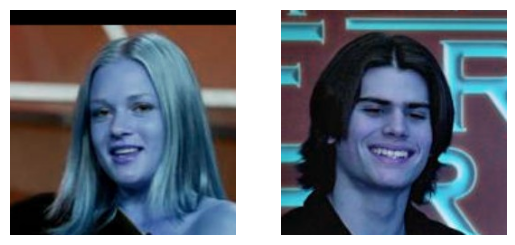

Sample: 2
all-pics/Aaron_Eckhart_0001.jpg all-pics/Aaron_Guiel_0001.jpg
Creating a new Negative entry


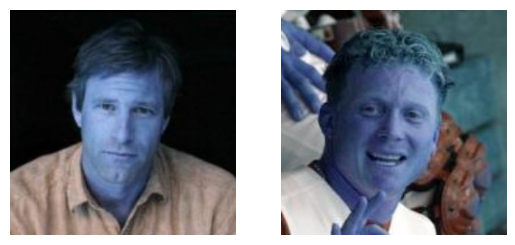

Sample: 4
all-pics/Aaron_Patterson_0001.jpg all-pics/Aaron_Peirsol_0001.jpg
Creating a new Negative entry


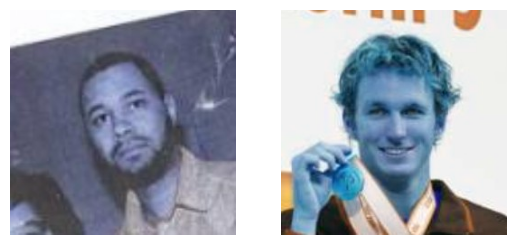

Sample: 6
all-pics/Aaron_Peirsol_0002.jpg all-pics/Aaron_Peirsol_0003.jpg
Creating a new Positive entry


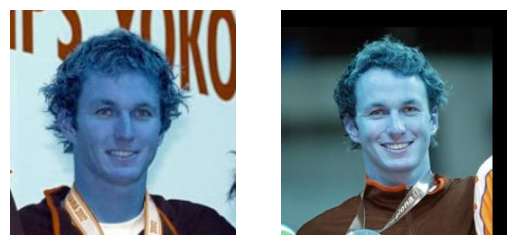

Sample: 8
all-pics/Aaron_Peirsol_0004.jpg all-pics/Aaron_Pena_0001.jpg
Creating a new Negative entry


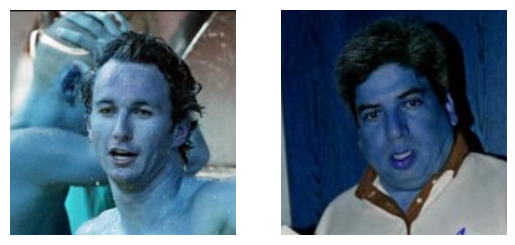

Sample: 10
all-pics/Aaron_Sorkin_0001.jpg all-pics/Aaron_Sorkin_0002.jpg
Creating a new Positive entry


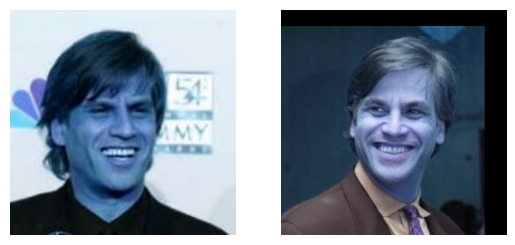

Sample: 12
all-pics/Aaron_Tippin_0001.jpg all-pics/Abba_Eban_0001.jpg
Creating a new Negative entry


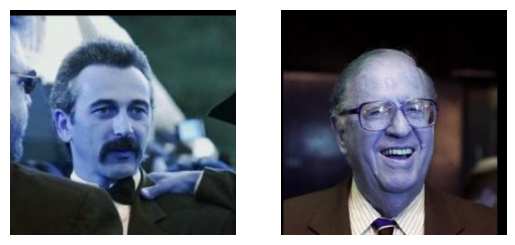

Sample: 14
all-pics/Abbas_Kiarostami_0001.jpg all-pics/Abdel_Aziz_Al-Hakim_0001.jpg
Creating a new Negative entry


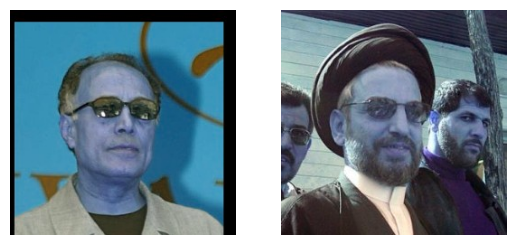

Sample: 16
all-pics/Abdel_Madi_Shabneh_0001.jpg all-pics/Abdel_Nasser_Assidi_0001.jpg
Creating a new Negative entry


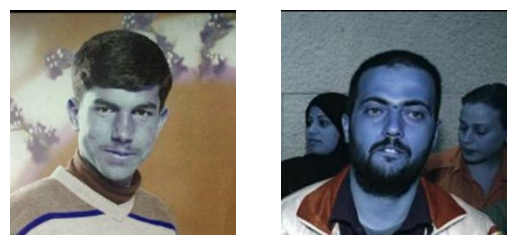

Sample: 18
all-pics/Abdel_Nasser_Assidi_0002.jpg all-pics/Abdoulaye_Wade_0001.jpg
Creating a new Negative entry


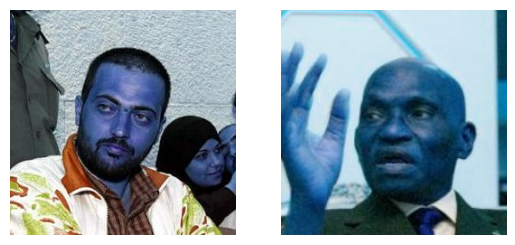

Sample: 20
all-pics/Abdoulaye_Wade_0002.jpg all-pics/Abdoulaye_Wade_0003.jpg
Creating a new Positive entry


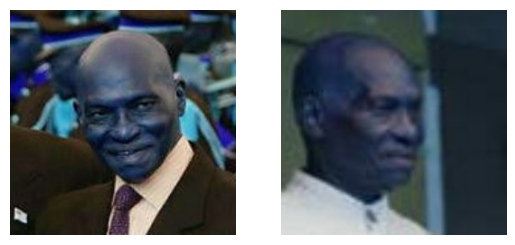

Sample: 22
all-pics/Abdoulaye_Wade_0004.jpg all-pics/Abdul_Majeed_Shobokshi_0001.jpg
Creating a new Negative entry


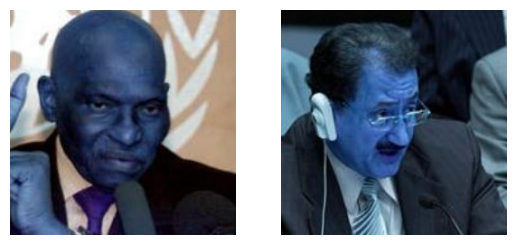

Sample: 24
all-pics/Abdul_Rahman_0001.jpg all-pics/Abdulaziz_Kamilov_0001.jpg
Creating a new Negative entry


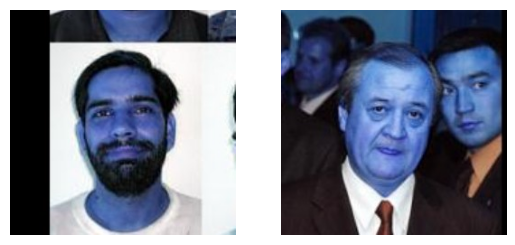

Sample: 26
all-pics/Abdullah_0001.jpg all-pics/Abdullah_0002.jpg
Creating a new Positive entry


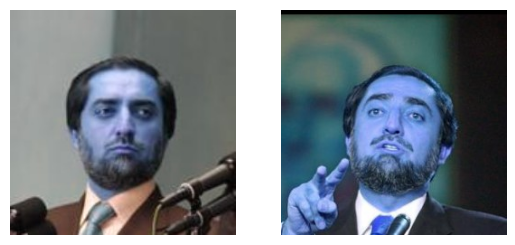

Sample: 28
all-pics/Abdullah_0003.jpg all-pics/Abdullah_0004.jpg
Creating a new Positive entry


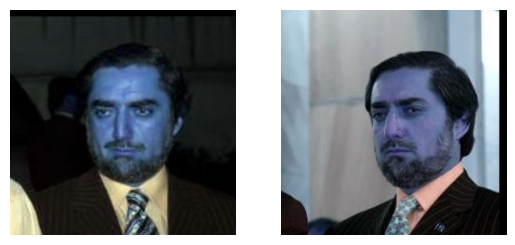

Sample: 30
all-pics/Abdullah_Ahmad_Badawi_0001.jpg all-pics/Abdullah_Gul_0001.jpg
Creating a new Negative entry


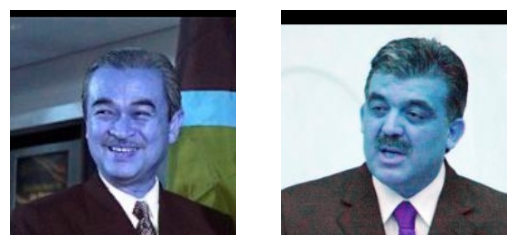

Sample: 32
all-pics/Abdullah_Gul_0002.jpg all-pics/Abdullah_Gul_0003.jpg
Creating a new Positive entry


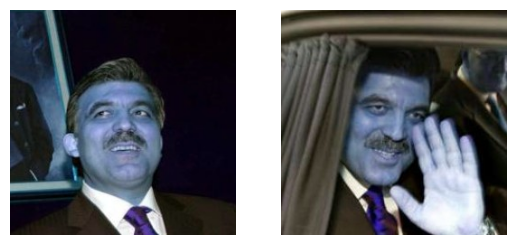

Sample: 34
all-pics/Abdullah_Gul_0004.jpg all-pics/Abdullah_Gul_0005.jpg
Creating a new Positive entry


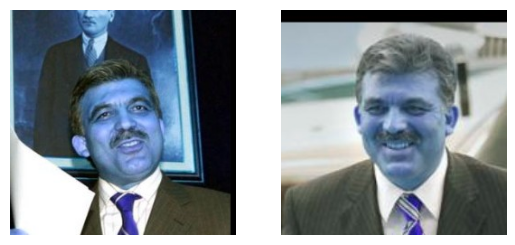

Sample: 36
all-pics/Abdullah_Gul_0006.jpg all-pics/Abdullah_Gul_0007.jpg
Creating a new Positive entry


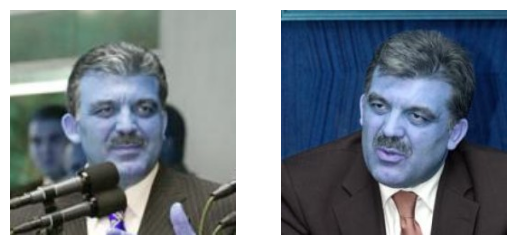

Sample: 38
all-pics/Abdullah_Gul_0008.jpg all-pics/Abdullah_Gul_0009.jpg
Creating a new Positive entry


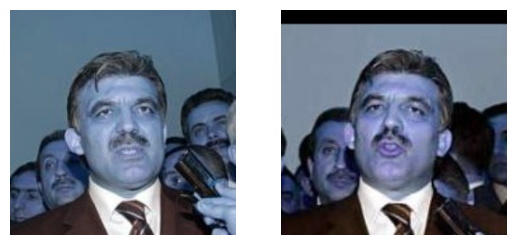

Sample: 40
all-pics/Abdullah_Gul_0010.jpg all-pics/Abdullah_Gul_0011.jpg
Creating a new Positive entry


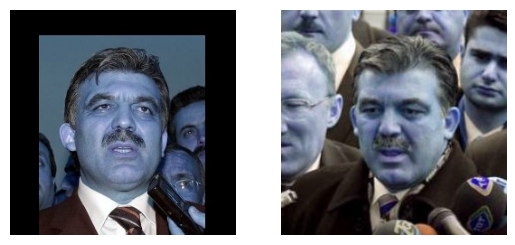

Sample: 42
all-pics/Abdullah_Gul_0012.jpg all-pics/Abdullah_Gul_0013.jpg
Creating a new Positive entry


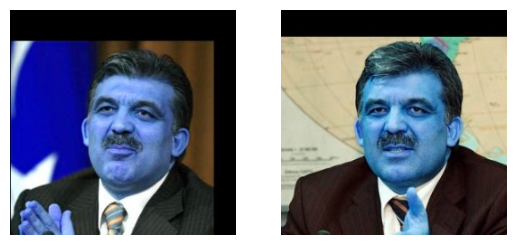

Sample: 44
all-pics/Abdullah_Gul_0014.jpg all-pics/Abdullah_Gul_0015.jpg
Creating a new Positive entry


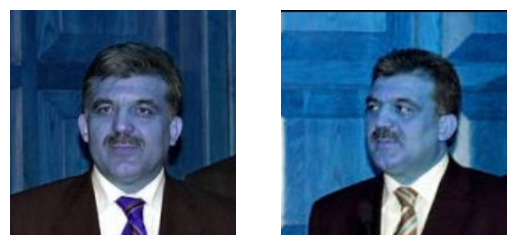

Sample: 46
all-pics/Abdullah_Gul_0016.jpg all-pics/Abdullah_Gul_0017.jpg
Creating a new Positive entry


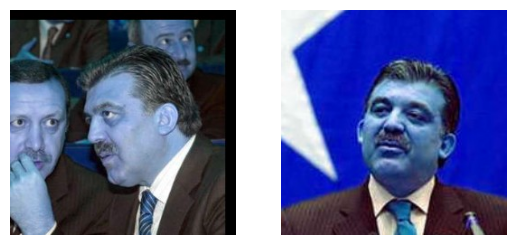

Sample: 48
all-pics/Abdullah_Gul_0018.jpg all-pics/Abdullah_Gul_0019.jpg
Creating a new Positive entry


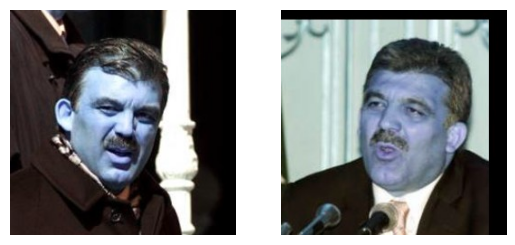

In [15]:
# Creating Dataset
# data_limit = (int(len(files) / 2)) * 2
data_limit = 50
used_samples = 0
while used_samples < data_limit:
    print("Sample: {}".format(used_samples))
    next_img_path = get_next_image_path(files[used_samples])
    if(next_img_path == None):
        make_entry(files[used_samples], files[used_samples + 1], 0)
    else:
        make_entry(files[used_samples], next_img_path, 1)
    used_samples += 2
        

# Exporting to csv

In [12]:
arr = np.asarray(data)
pd.DataFrame(arr).to_csv("sample_data.csv", index="Index", header = [ "anchor", 'image', 'label'])